# 단변량 분석

* 분석할 수 있는 데이터 형태 : 숫자형, 범주형

### 1) 숫자형 변수

> 기초통계량 : min, max, mean, std, 사분위수  
> 시각화 : histogram, density plot, boxplot, violinplot

In [56]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 불러오기
data = pd.read_csv("https://bit.ly/3HaMAtZ", usecols = ['Age','Fare'])
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')

* 기초통계량 조회

In [51]:
print(data['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


* histogram

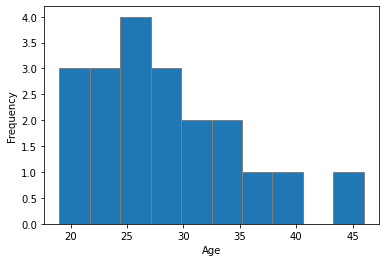

빈도수 :  [3. 3. 4. 3. 2. 2. 1. 1. 0. 1.]
구간값 :  [19.  21.7 24.4 27.1 29.8 32.5 35.2 37.9 40.6 43.3 46. ]


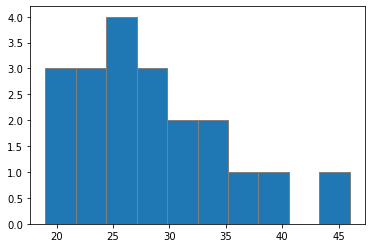

In [11]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]

plt.hist(age, bins=10, edgecolor='grey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

hist1 = plt.hist(age, bins=10, edgecolor='grey')
print("빈도수 : ", hist1[0])
print("구간값 : ", hist1[1])

* density plot

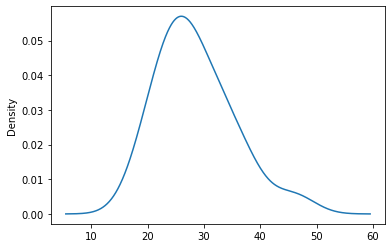

In [14]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
age = pd.Series(age)
age.plot(kind='kde')
plt.show()

              Age        Fare
count  891.000000  891.000000
mean    29.754770   32.204208
std     13.277378   49.693429
min      0.420000    0.000000
25%     21.770000    7.910400
50%     30.000000   14.454200
75%     35.900000   31.000000
max     80.000000  512.329200


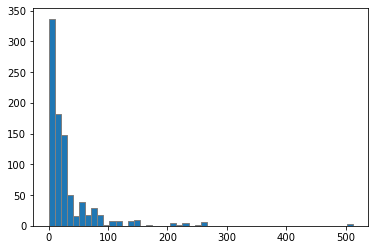

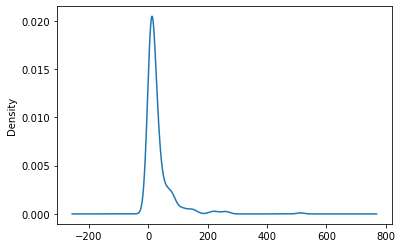

In [23]:
# 기초 통계량
print(data.describe())

# 히스토그램
plt.hist(data['Fare'], bins=50, edgecolor='grey')
plt.show()

# 밀도함수 그래프
data['Fare'].plot(kind='kde')
plt.show()

* boxplot  
  
    * IQR : 3사분위수 - 1사분위수
    * 박스 : 4분위수
    * 이상치 : 대부분의 데이터가 가지고 있는 패턴에서 벗어난 값
    * 수염 : 이상치 판별 용도
    * 수염 fence : MIN과 1사분위수 - (1.5 * IQR) 중에 큰 값,  
        MAX와 3사분위수 + (1.5 * IQR) 중에 작은 값.

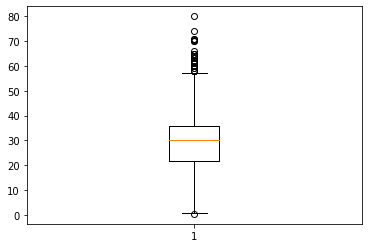

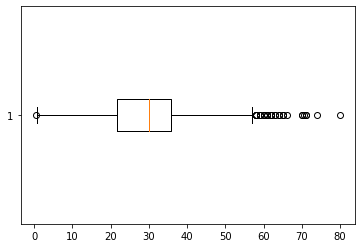

"수염의 min, max 값"
[21.77  0.67]
[35.9 57. ]

"수염 fence 값"
0.67
57.0

"이상치"
       Age      Fare
11   58.00   26.5500
33   66.00   10.5000
54   65.00   61.9792
94   59.00    7.2500
96   71.00   34.6542
116  70.50    7.7500
170  61.00   33.5000
195  58.00  146.5208
232  59.00   13.5000
252  62.00   26.5500
268  58.00  153.4625
275  63.00   77.9583
280  65.00    7.7500
326  61.00    6.2375
366  60.00   75.2500
438  64.00  263.0000
456  65.00   26.5500
483  63.00    9.5875
487  58.00   29.7000
493  71.00   49.5042
545  64.00   26.0000
555  62.00   26.5500
570  62.00   10.5000
587  60.00   79.2000
625  61.00   32.3208
630  80.00   30.0000
659  58.00  113.2750
672  70.00   10.5000
684  60.00   39.0000
694  60.00   26.5500
745  70.00   71.0000
803   0.42    8.5167
829  62.00   80.0000
851  74.00    7.7750


In [77]:
plt.boxplot(data['Age'])
plt.show()

# 수평으로 그리기
box1 = plt.boxplot(data['Age'], vert=False)
plt.show()

# 수염의 min, max 값
print('"수염의 min, max 값"')
left_whisker = box1['whiskers'][0].get_xdata()
right_whisker = box1['whiskers'][1].get_xdata()
print(left_whisker)
print(right_whisker)

# 수염 fence 값
print('\n"수염 fence 값"')
print(left_whisker[1])
print(right_whisker[1])

# 이상치
print('\n"이상치"')
c1 = data['Age'] < left_whisker[1]
c2 = data['Age'] > right_whisker[1]
print(data.loc[(c1) | (c2)])

* violinplot

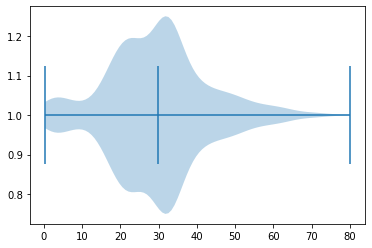

In [54]:
plt.violinplot(data['Age'], vert=False, showmeans=True)
plt.show()

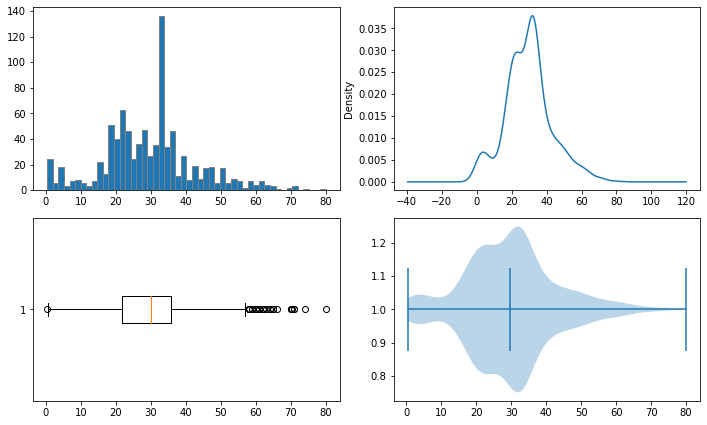

In [47]:
# 4가지 플롯 한꺼번에 그리기
# 숫자형 변수의 분포를 4가지 플롯으로 시각화하여 확인할 수 있다.
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=50, edgecolor='grey')

plt.subplot(2, 2, 2)
data['Age'].plot(kind='kde')

plt.subplot(2, 2, 3)
plt.boxplot(data['Age'], vert=False)

plt.subplot(2, 2, 4)
plt.violinplot(data['Age'], vert=False, showmeans=True)

plt.tight_layout()
plt.show()

### 2) 범주형 변수

> 기초통계량 : 범주별 빈도수, 범주별 비율  
> 시각화 : bar chart, pie chart

* 기초통계량 조회

In [60]:
print(titanic['Pclass'].value_counts())
print(titanic['Pclass'].value_counts() / len(titanic['Pclass']))

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


* bar chart => 범주별 개수 시각화

3    491
1    216
2    184
Name: Pclass, dtype: int64


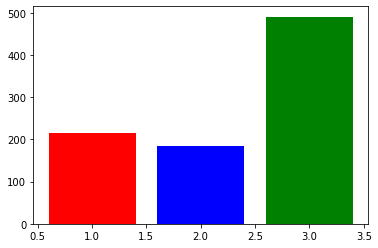

In [63]:
# 집계
cnt = titanic['Pclass'].value_counts()
print(cnt)

# 시각화
plt.bar(cnt.index, cnt.values, color=['g', 'r', 'b'])
plt.show()

* pie chart => 범주별 비율 시각화

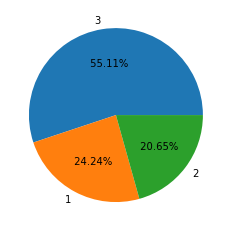

In [67]:
# 집계
cnt = titanic['Pclass'].value_counts()

# 시각화
plt.pie(cnt.values, labels=cnt.index, autopct='% .2f%%')
plt.show()